In [6]:
import cv2
from skimage import data
from skimage import filters
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import imFerramentas as imF

Carregamento da imagem e diminuindo o tamanho para optimizar o o processamento da mesma.
Conversao do formato da imagem de BGR para RGB.

In [7]:
img = cv2.imread("../imagens/Atividade2a.jpg")
#img = cv2.imread("Atividade2b.jpg")
escala = 60
largura = int(img.shape[1] * escala / 100)
altura = int(img.shape[0] * escala / 100)
dim = (largura, altura)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img = img
imgRGB= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Nao foi possivel visualizar de forma clara as celuas verdes para com o processamento de imagem imagem e histograma por RGB.

(array([   34.,    45.,    51.,    50.,    44.,    43.,    28.,    40.,
           74.,   378.,  1012.,  1370.,  1571.,  1445.,  1726.,  2196.,
         3210.,  3763.,  3518.,  4330.,  5285.,  6361.,  5963.,  7246.,
         7535.,  8858., 11303., 11564., 15504., 18943., 19012.,  4666.]),
 array([  6.     ,  13.78125,  21.5625 ,  29.34375,  37.125  ,  44.90625,
         52.6875 ,  60.46875,  68.25   ,  76.03125,  83.8125 ,  91.59375,
         99.375  , 107.15625, 114.9375 , 122.71875, 130.5    , 138.28125,
        146.0625 , 153.84375, 161.625  , 169.40625, 177.1875 , 184.96875,
        192.75   , 200.53125, 208.3125 , 216.09375, 223.875  , 231.65625,
        239.4375 , 247.21875, 255.     ]),
 <BarContainer object of 32 artists>)

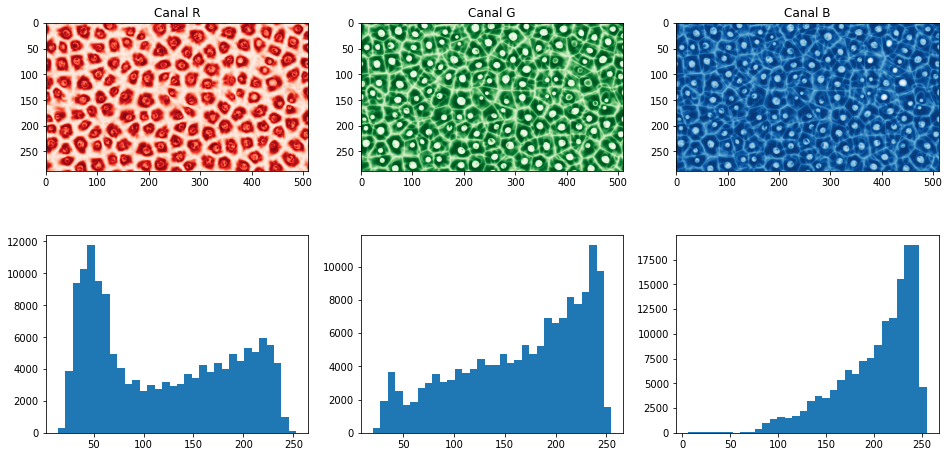

In [8]:
fig = plt.figure(figsize=(16, 8))
sub_imagem = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(imgRGB[:,:,0],cmap="Reds")
sub_imagem.set_title('Canal R')

sub_imagem = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(imgRGB[:,:,1],cmap="Greens")
sub_imagem.set_title('Canal G')

sub_imagem = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(imgRGB[:,:,2],cmap="Blues")
sub_imagem.set_title('Canal B')

sub_imagem = fig.add_subplot(2, 3, 4)
plt.hist(imgRGB[:,:,0].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 5)
plt.hist(imgRGB[:,:,1].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 6)
plt.hist(imgRGB[:,:,2].flatten(), 32)

Apos a conversao da imagem RGB para tons de Cinza, analizamos a aplicaçao do metodo OTSU para a limiarização. Concluindo atraves da imagem e do histograma, nao sendo possivel a identificação das celulas verdes.

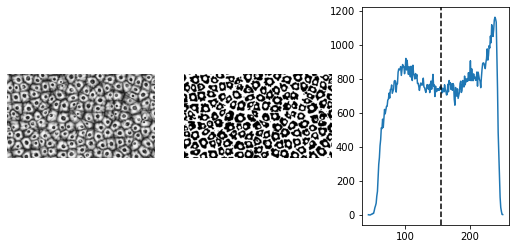

In [9]:
imageCinza = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)

limiar = filters.threshold_otsu(imageCinza)
hist, valores = exposure.histogram(imageCinza) 

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(imageCinza, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(imageCinza < limiar, cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.plot(valores, hist)
plt.axvline(limiar, color='k', ls='--')

plt.show()

Utilizando o metodo K-Means para tentar segmentar as celulas verdes nao foi possivel identificar as celulas verdes. Para indenticacoes futuras alterar os parametros em estrutura de repeticao, pode ser viavel identificar as celulas verdes.


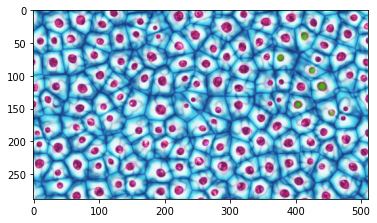

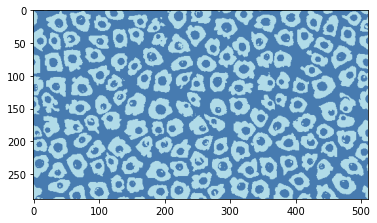

In [10]:

plt.imshow(imgRGB)
plt.show()

imgRGB = imgRGB.reshape((-1, 3))

imgRGB = np.float32(imgRGB)
criterio_parada = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
_, labels, centers = cv2.kmeans(imgRGB, k, None, criterio_parada, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

labels = labels.flatten()

imagem_segmentada = centers[labels.flatten()]

imagem_segmentada = imagem_segmentada.reshape(img.shape)

plt.imshow(imagem_segmentada)
plt.show()


Para diminuir o ruido da imagem foi utilizado o metodo de media da OpenCV e realizado o processamento da imagem de BGR para HSV. No Canal H sendo visivel as celulas verdes para limiarização.

(array([3.0000e+00, 1.3000e+01, 2.6000e+01, 8.9000e+01, 1.2800e+02,
        2.5800e+02, 3.2600e+02, 6.1000e+02, 8.1000e+02, 1.5140e+03,
        1.7780e+03, 2.9700e+03, 2.9460e+03, 4.4540e+03, 4.1530e+03,
        5.7010e+03, 6.1910e+03, 5.3410e+03, 6.9410e+03, 6.0220e+03,
        7.9280e+03, 6.8510e+03, 9.3380e+03, 7.7740e+03, 1.0450e+04,
        8.7040e+03, 1.0983e+04, 8.0840e+03, 9.3480e+03, 6.9180e+03,
        8.0360e+03, 2.4800e+03]),
 array([105.     , 109.53125, 114.0625 , 118.59375, 123.125  , 127.65625,
        132.1875 , 136.71875, 141.25   , 145.78125, 150.3125 , 154.84375,
        159.375  , 163.90625, 168.4375 , 172.96875, 177.5    , 182.03125,
        186.5625 , 191.09375, 195.625  , 200.15625, 204.6875 , 209.21875,
        213.75   , 218.28125, 222.8125 , 227.34375, 231.875  , 236.40625,
        240.9375 , 245.46875, 250.     ]),
 <BarContainer object of 32 artists>)

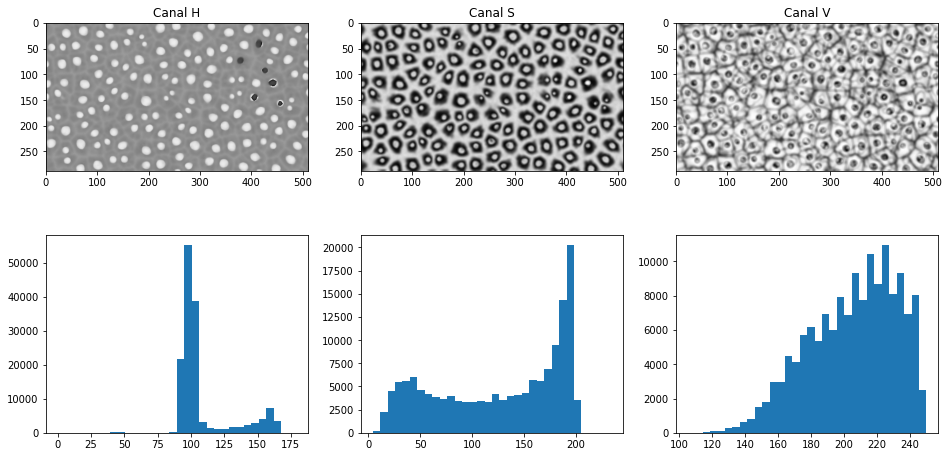

In [11]:

imgMediaBlur = cv2.blur(img, (5, 5))
imgHSV= cv2.cvtColor(imgMediaBlur, cv2.COLOR_BGR2HSV)

fig = plt.figure(figsize=(16, 8))
sub_imagem = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(imgHSV[:,:,0],cmap="gray")
sub_imagem.set_title('Canal H')

sub_imagem = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(imgHSV[:,:,1],cmap="gray")
sub_imagem.set_title('Canal S')

sub_imagem = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(imgHSV[:,:,2],cmap="gray")
sub_imagem.set_title('Canal V')

sub_imagem = fig.add_subplot(2, 3, 4)
plt.hist(imgHSV[:,:,0].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 5)
plt.hist(imgHSV[:,:,1].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 6)
plt.hist(imgHSV[:,:,2].flatten(), 32)

Com o Canal H foi submetido varias limiarição e exibição de intervalo para melhor identificacao das celulas verdes. No final salvando a imagem com o melhor parametro de limiarizacao do canal H para ser utilizada como mascara.

Text(0.5, 1.0, 'Canal H Limiarizado (0-60)')

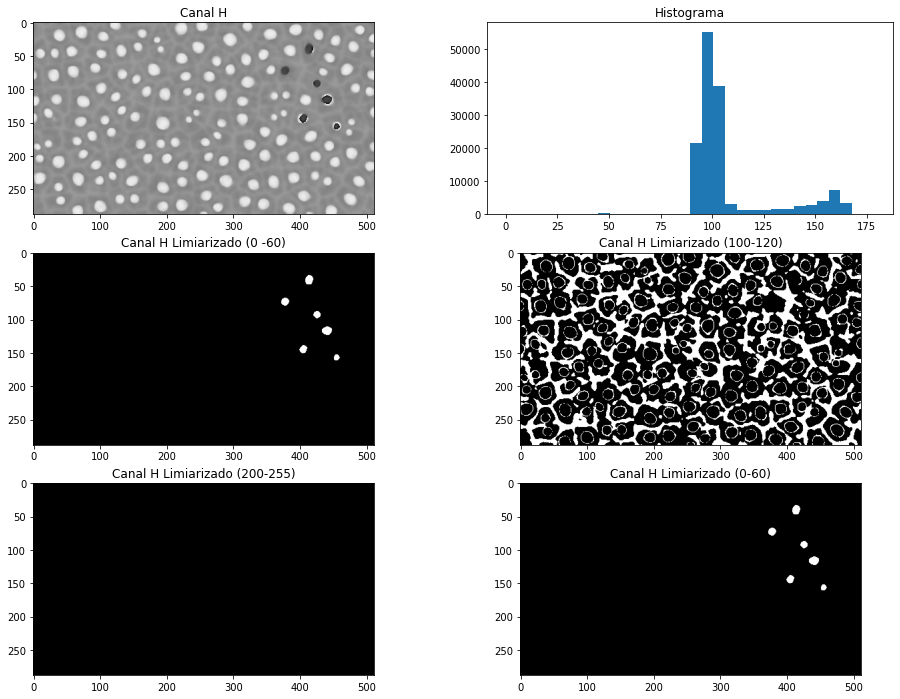

In [12]:
canal_H = imgHSV[:,:,0]

fig = plt.figure(figsize=(16, 12))

sub_imagem = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(canal_H,cmap="gray")
sub_imagem.set_title('Canal H')

sub_imagem = fig.add_subplot(3, 2, 2)
plt.hist(canal_H.flatten(), 32)
sub_imagem.set_title('Histograma')

sub_imagem = fig.add_subplot(3, 2, 3)
canal_H_lim = imF.limiarizacao_janela(canal_H, 0,60)
imgplot = plt.imshow(canal_H_lim,cmap="gray")
sub_imagem.set_title('Canal H Limiarizado (0 -60)')

sub_imagem = fig.add_subplot(3, 2, 4)
canal_H_lim = imF.limiarizacao_janela(canal_H, 100,120) 
imgplot = plt.imshow(canal_H_lim,cmap="gray")
sub_imagem.set_title('Canal H Limiarizado (100-120)')


sub_imagem = fig.add_subplot(3, 2, 5)
canal_H_lim = imF.limiarizacao_janela(canal_H, 200,255) 
imgplot = plt.imshow(canal_H_lim,cmap="gray")
sub_imagem.set_title('Canal H Limiarizado (200-255)')


sub_imagem = fig.add_subplot(3, 2, 6)
canal_H_lim = imF.limiarizacao_janela(canal_H, 0,60) 
imgplot = plt.imshow(canal_H_lim,cmap="gray")
sub_imagem.set_title('Canal H Limiarizado (0-60)')

Ao aplicar a mascara de limiarizacao do Canal H sobre a imagem original foi possivel isolar apenas as celulas verdes da imagem.

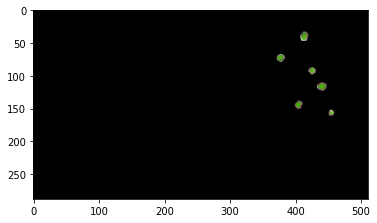

In [47]:
final=cv2.bitwise_and(img,img,mask=canal_H_lim)
final=cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
plt.imshow(final)

Para complementar foi utilizado tecnicas de segmentação por corer com base na imagem processada em HSV. Ao separar cada pixel da imagem com filtro de ruidos, e exibida em um grafico de dispersao 3D seguindo a posição pelo HSV é possivel a visualizacao dos tons verdes da celula por tras.

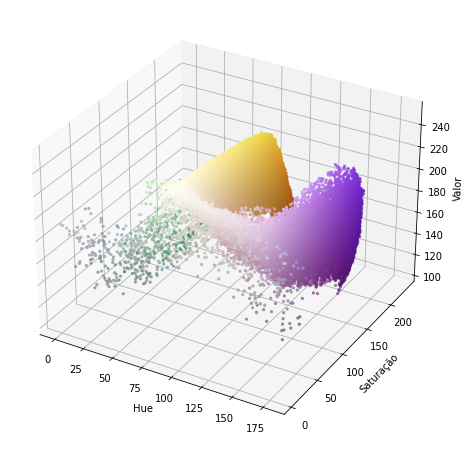

In [13]:

h, s, v = cv2.split(imgHSV)
fig = plt.figure(figsize=(16,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

cor_pixels = imgMediaBlur.reshape((np.shape(imgMediaBlur)[0]*np.shape(imgMediaBlur)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(cor_pixels)
cor_pixels = norm(cor_pixels).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=cor_pixels, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturação")
axis.set_zlabel("Valor")
plt.show()

Buscando melhor identificacao dos pixeis verdes em um grafico de dispersao 3D foi inserido alguns limites de plotagem.

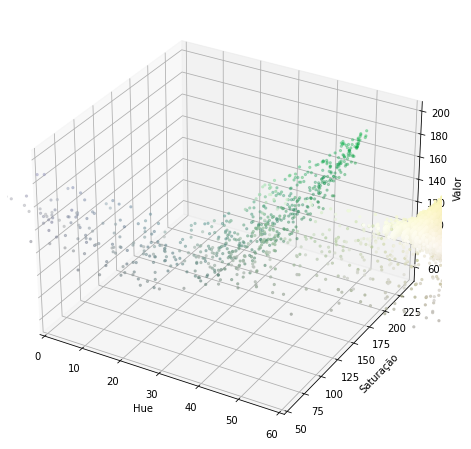

In [14]:
fig = plt.figure(figsize=(16,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

cor_pixels = imgMediaBlur.reshape((np.shape(imgMediaBlur)[0]*np.shape(imgMediaBlur)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(cor_pixels)
cor_pixels = norm(cor_pixels).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=cor_pixels, marker=".")
axis.set_xlabel("Hue")
axis.set_xlim3d(0,60)
axis.set_ylabel("Saturação")
axis.set_ylim3d(50,245)
axis.set_zlabel("Valor")
axis.set_zlim3d(50,205)
plt.show()

Resultado final da segmentacao de cores sendo salva com filtos da imagem como mascara e aplicado sobre a imagem original para a identificacao das celulas verdes.
Realizando uma estrutura de repeticao sobre a mascara para contar a quantidade de pixeis é possivel saber se existem celulas verdes na imagem.

Imagem contem 105 pixeis verde


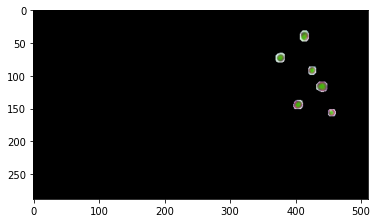

In [39]:
quantVerde=0
lower= np.array([0, 50, 50])
upper= np.array([60, 245, 205])
mask= cv2.inRange(imgHSV, lower, upper)
maskMedia = cv2.blur(mask, (5, 5))

plt.imshow(maskMedia,cmap="gray")

final=cv2.bitwise_and(img,img,mask=maskMedia)
final=cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
plt.imshow(final)
for a in maskMedia.flatten()[:]==255:
  if a:
    quantVerde+=1
if quantVerde>10:
  print("Imagem contem %d pixeis verde" % quantVerde)
else:
  print("Imagem nao contem pixeis verde")